In [151]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import ffmpeg
%matplotlib inline
from PIL import Image

import datetime
import warnings
warnings.filterwarnings("ignore")
import math

import os
import re


In [212]:
print ('cv2 version = {}'.format(cv2.__version__))
video_cap = cv2.VideoCapture('../EMP006_blackbox/EMP006_8_2017-09-22_18_49_53/EMP006_8_2017-09-22_18_49_53_dual_video-1506106434786708.mp4')
fps = video_cap.get(cv2.CAP_PROP_FPS)
pos_msec = video_cap.get(cv2.CAP_PROP_POS_MSEC)
pos_frames = video_cap.get(cv2.CAP_PROP_POS_FRAMES)
num_frames = video_cap.get(cv2.CAP_PROP_FRAME_COUNT)
width = video_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print ('fps = {}, pos_msec = {}, pos_frames = {}, num_frames = {}, width = {}, height = {}'
      .format(fps, pos_msec, pos_frames, num_frames, width, height))


cv2 version = 3.4.0
fps = 25.488940900331407, pos_msec = 0.0, pos_frames = 0.0, num_frames = 1529.0, width = 752.0, height = 960.0


In [183]:
# Process and save Images frame by frame 1/4 second
for i in range (0,240,1):
    video_cap.set(cv2.CAP_PROP_POS_MSEC,i*250)
    success,image = video_cap.read()
    if success:
        cv2.imwrite('v_frames/{}.png'.format(i), image)

In [215]:
# Extract all frames
bol,images = video_cap.read()
count = 0
bol = True
while bol:
    cv2.imwrite('video_frame/{}.png'.format(count), images)     # save frame as JPEG file
    bol,images = video_cap.read()
    count += 1

In [216]:
def video_to_frames(video, path_output_dir):
    vidcap = cv2.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    cv2.destroyAllWindows()
    vidcap.release()

video_to_frames('../EMP006_blackbox/EMP006_8_2017-09-22_18_49_53/EMP006_8_2017-09-22_18_49_53_dual_video-1506106434786708.mp4','video_frame')


## Combine data & images

In [154]:
from PIL import Image

In [217]:
im1 = Image.open('dt_frame/0.png')
im2 = Image.open('video_frame/0.png')

In [220]:
#from __future__ import print_function

In [221]:
print(im1.format, im1.size, im1.mode)

PNG (752, 960) RGBA


In [222]:
def bind_images(file1, file2):
    image1 = Image.open(file1)
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = width1 + width2
    result_height = max(height1, height2)
    
    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image2, box=(0, 0))
    result.paste(im=image1, box=(width1, 0))
    return result

In [223]:
imgs_dir = 'video_frame/'
data_dir = 'dt_frame/'
imgs_list = os.listdir(imgs_dir)
data_list = os.listdir(data_dir)

In [224]:
for imgs in imgs_list:
    for data in data_list:
        if imgs == data:
            result = bind_images(data_dir + data, imgs_dir + imgs)
            result.save('binded_res/{}'.format(data))

## video generator

In [231]:
im1 = Image.open('binded_res/0.png')
im1.size, im1.mode

((1504, 960), 'RGB')

In [234]:
from natsort import natsorted, ns
imgs_list = os.listdir('binded_res')
imgs_list = natsorted(imgs_list, key=lambda y: y.lower())

In [235]:
video = cv2.VideoWriter('test1.mp4', -1, 25.4333, (im1.size))
for image in imgs_list:
    img = cv2.imread('binded_res/' + image)
    #images = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    video.write(img)

cv2.destroyAllWindows()
video.release()

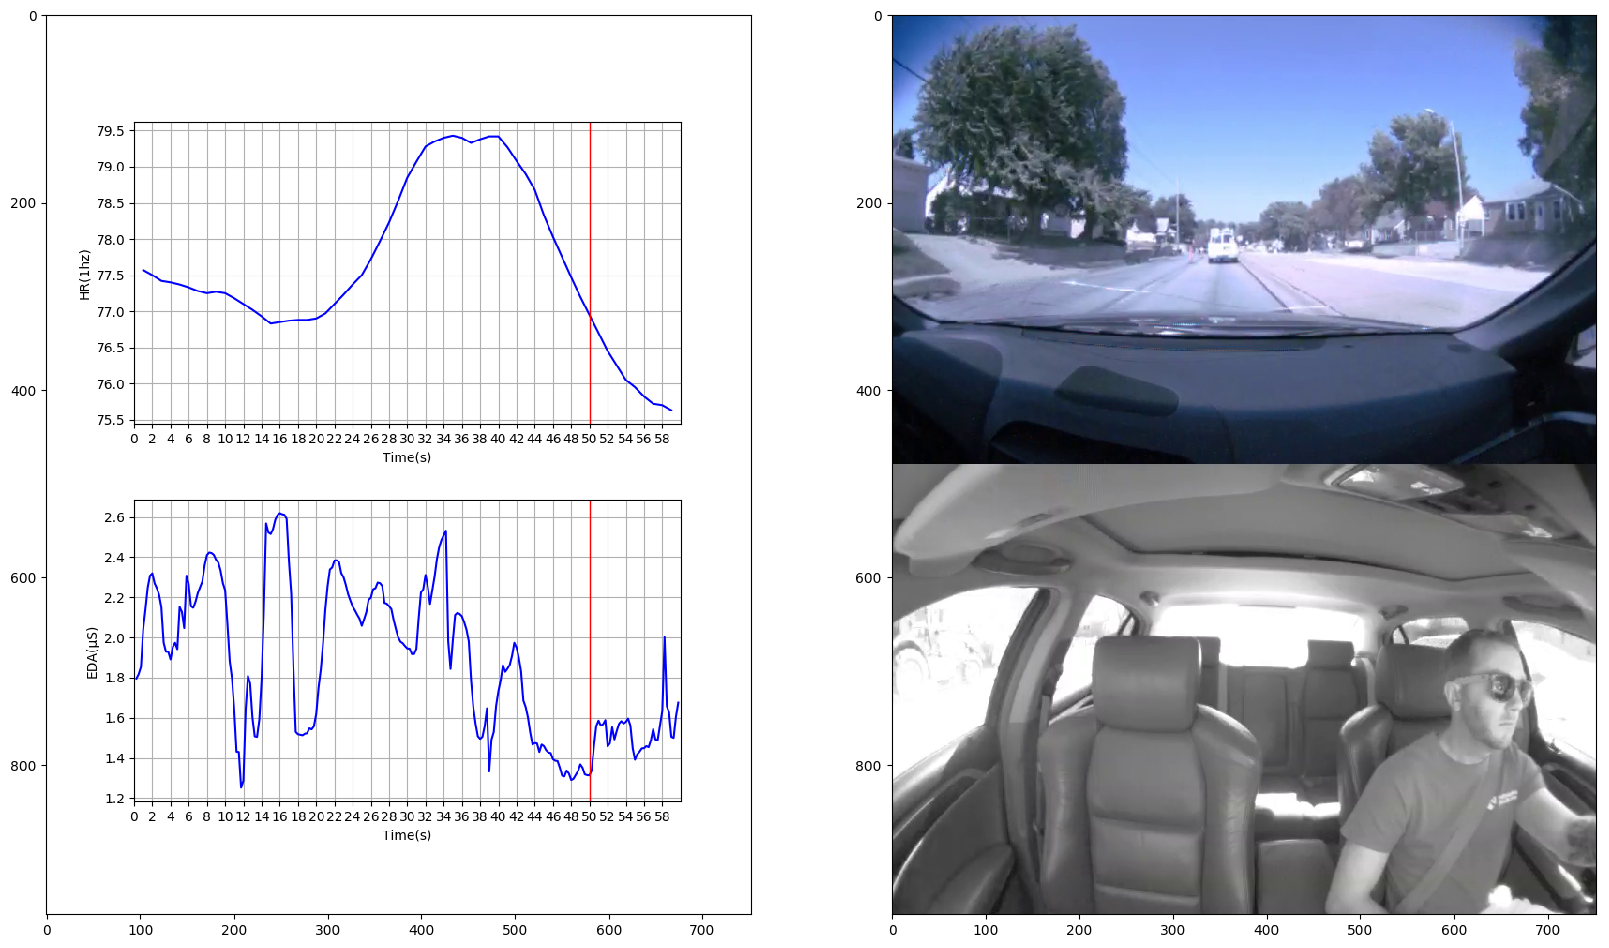

In [103]:
from ipywidgets import interact, interactive, fixed
from matplotlib import gridspec

fig= plt.figure(figsize=(20,20), dpi=100)
gs = gridspec.GridSpec(1, 2, wspace=0.05, hspace=0.25)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.imshow(im1)
ax1.imshow(im2)

fig.savefig('2.png')
#plt.imshow(img1)
#plt.show()

In [84]:
img1 = cv2.imread('data_frames/50.0.png')
img2 = cv2.imread('v_frames/50.0.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [ ]:
# 1/4 second break
frameRate = video_cap.get(5)/4 #frame rate
while(video_cap.isOpened()):
    frameId = video_cap.get(1) #current frame number
    #video_cap.set(cv2.CAP_PROP_POS_FRAMES,flag) #设置帧数标记
    ret, frame = video_cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = 'frames/' +  str(int(frameId/25)) + '.png'
        cv2.imwrite(filename, frame)
video_cap.release()